<a href="https://colab.research.google.com/github/chenw7/Image-Processing/blob/main/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all neccesary libraries

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Declaring a function to plot the images in the database

In [ ]:
def plot_images_label(images, labels, idx, num = 10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)

  for i in range(0, num):
    ax = plt.subplot(5, 5, i+1)
    ax.imshow(images[idx], cmap = 'binary')
    title = "label: " + str(labels[idx])

    ax.set_title(title, fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx += 1

  plt.show()

Importing the MNIST database, loading the data, and printing a few images in the database

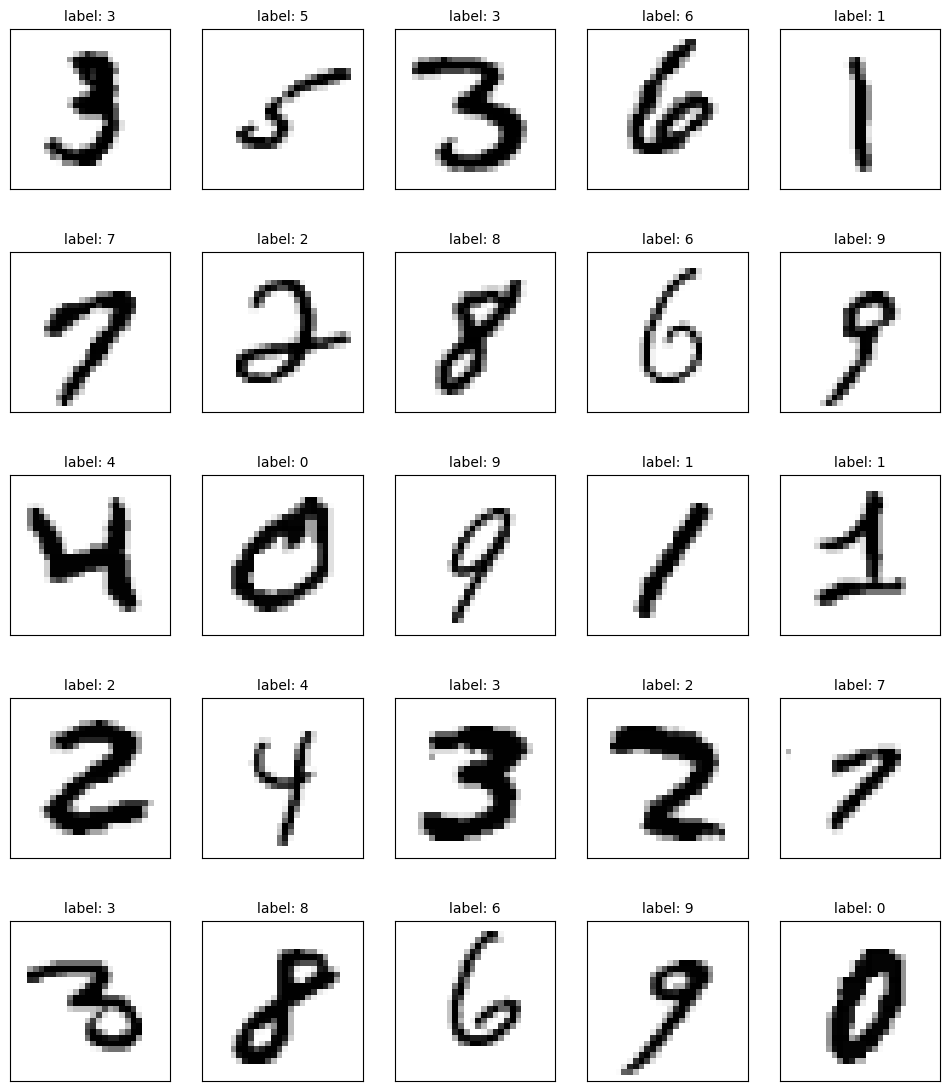

In [ ]:
(train_img, train_labels),(test_img, test_labels) = mnist.load_data()
plot_images_label(train_img, train_labels, 10, 25)

Data Normalization and One-hot Encoding

In [ ]:
Train_Normalize = (train_img.reshape(60000, 784).astype('float32'))/255
Test_Normalize = (test_img.reshape(10000, 784).astype('float32'))/255

TrainOneHot = np_utils.to_categorical(train_labels)
TestOneHot = np_utils.to_categorical(test_labels)

Training Model Initialization

In [ ]:
model = Sequential()
model.add(Dense(units = 256, input_dim = 784, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


Actual Training of the Model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x = Train_Normalize, y = TrainOneHot, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 2)

Epoch 1/10
270/270 - 3s - loss: 0.4121 - accuracy: 0.8909 - val_loss: 0.1811 - val_accuracy: 0.9507 - 3s/epoch - 11ms/step
Epoch 2/10
270/270 - 2s - loss: 0.1771 - accuracy: 0.9492 - val_loss: 0.1299 - val_accuracy: 0.9625 - 2s/epoch - 7ms/step
Epoch 3/10
270/270 - 2s - loss: 0.1251 - accuracy: 0.9631 - val_loss: 0.0999 - val_accuracy: 0.9732 - 2s/epoch - 8ms/step
Epoch 4/10
270/270 - 3s - loss: 0.0949 - accuracy: 0.9729 - val_loss: 0.0893 - val_accuracy: 0.9755 - 3s/epoch - 13ms/step
Epoch 5/10
270/270 - 2s - loss: 0.0748 - accuracy: 0.9785 - val_loss: 0.0826 - val_accuracy: 0.9750 - 2s/epoch - 8ms/step
Epoch 6/10
270/270 - 2s - loss: 0.0604 - accuracy: 0.9834 - val_loss: 0.0757 - val_accuracy: 0.9770 - 2s/epoch - 7ms/step
Epoch 7/10
270/270 - 2s - loss: 0.0495 - accuracy: 0.9860 - val_loss: 0.0728 - val_accuracy: 0.9785 - 2s/epoch - 7ms/step
Epoch 8/10
270/270 - 2s - loss: 0.0409 - accuracy: 0.9886 - val_loss: 0.0681 - val_accuracy: 0.9790 - 2s/epoch - 7ms/step
Epoch 9/10
270/270 - 2

Storing Prediction for Further Analysis

In [ ]:
predictions = model.predict(Test_Normalize)
predicted_labels = np.argmax(predictions, axis = 1)

313/313 [==============================] - 1s 2ms/step


Analyzing Accuracy of Trained Model

In [ ]:
scores = model.evaluate(Test_Normalize, TestOneHot)
print('accuracy', scores[1])
pd.crosstab(test_labels, predicted_labels, rownames = ['label'], colnames = ['prediction'])

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9795
accuracy 0.9794999957084656


prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,966,0,1,2,1,0,4,1,2,3
1,0,1126,3,0,0,1,2,1,2,0
2,3,0,1011,3,1,0,2,4,8,0
3,0,0,2,989,1,6,0,5,3,4
4,1,0,0,1,961,0,6,2,0,11
5,2,0,0,10,1,866,6,0,4,3
6,3,2,2,1,1,2,946,0,1,0
7,0,7,7,4,1,1,0,999,2,7
8,3,0,3,7,5,4,2,4,945,1
